# Контрольное домашнее задание № 1.3
# Вариант 14

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import linprog

## Задание
Дана многокритериальная аналитическая задача:
    $$f_1 (x)=x_1+x_2→max,$$
$$f_2 (x)=-3x_1+x_2→max,$$
$$f_3 (x)=x_1-3x_2→max$$


Ограничения:

$$ D = \begin{cases}
x_1+x_2 ≥ 28 \\
x_1-2x_2 ≤ 14 \\
-3x_1+2x_2 ≤ 28 \\
0 ≤ x_1 ≤ 56 \\
0 ≤ x_2 ≤ 42
\end{cases} \ $$ 

L1: x1 + x2 > 28
L2: x1 - 2*x2 < 14
L3: -3*x1 + 2*x2 < 28


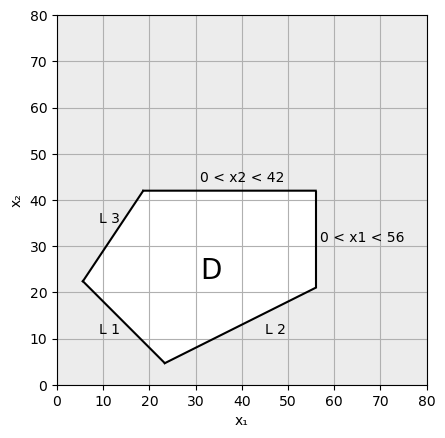

In [38]:
figure, axes = plt.subplots()

axes.set_xlim(xmin=0,xmax=80)
axes.set_ylim(ymin=0,ymax=80)


axes.grid()
plt.xlabel('x₁')
plt.ylabel('x₂')

d = np.linspace(0,100,3000)
x,y = np.meshgrid(d,d)

plt.imshow(((x+y>=28) & (x-2*y<=14) & (-3*x+2*y<=28) & (x > 0) & (x <= 56) & (y > 0) & (y <= 42))
           .astype(int), cmap='gray', extent=(x.min(), x.max(), y.min(), y.max()), origin='lower',alpha=0.075)

x = np.linspace(0,56,3000)
d1 = 28 - x
d2 = x/2 - 7
d3 = 14 + 1.5*x
d4 = (x*0)+42

idx13 = np.argwhere(np.diff(np.sign(d1 - d3))).flatten()
idx12 = np.argwhere(np.diff(np.sign(d1 - d2))).flatten()
idx34 = np.argwhere(np.diff(np.sign(d3 - d4))).flatten()

plt.plot(x[int(idx13):int(idx12)],d1[int(idx13):int(idx12)],color='k') 
plt.plot(x[int(idx12):],d2[int(idx12):],color='k') 
plt.plot(x[int(idx13):int(idx34)],d3[int(idx13):int(idx34)],color='k') 
plt.plot(x[int(idx34):],d4[int(idx34):],color='k') 
plt.text(57,31, '0 < x1 < 56')
plt.text(31,44, '0 < x2 < 42')
plt.text(9,11, 'L 1')
plt.text(45,11, 'L 2')
plt.text(9,35, 'L 3')

plt.vlines(x=56,ymin=21,ymax=42,color='k')

plt.text(31,23, 'D', fontsize=20)

print('L1: x1 + x2 > 28', 'L2: x1 - 2*x2 < 14', 'L3: -3*x1 + 2*x2 < 28', sep='\n')

$f_2 (x)$  - главный критерий

Дополнительные ограничения:
$$ Ď  = \begin{cases}
x_1+x_2 ≥ 70 \\
x_1-3x_2 ≥ - 84 \\
\end{cases} \ $$ 


In [28]:
a = np.array([[-1, -1], [1, -2], [-3, 2], 
              [-1, 0],[1, 0], [0, -1],[0, 1],[-1,-1],[-1,3]])
b = np.array([-28, 14, 28, 0, 56, 0, 42, -70, 84])
c = np.array([3, -1])
res = linprog(c, A_ub=a, b_ub=b)

print('Координаты оптимальной точки:', res.x,-
      '\nОптимальное значение f1:', res.x[0]+res.x[1],
      '\nОптимальное значение f2:', res.fun*-1,      
      '\nОптимальное значение f3:', res.x[0]-3 * res.x[1])


Координаты оптимальной точки: [31.5 38.5] 
Оптимальное значение f1: 70.0 
Оптимальное значение f2: -56.0 
Оптимальное значение f3: -84.0


L1: x1 + x2 > 28
L2: x1 - 2*x2 < 14
L3: -3*x1 + 2*x2 < 28

f1: x1 + x2 = 70
f2: -3*x1 + x2 = -56
f3: x1 - 3*x2 = -84


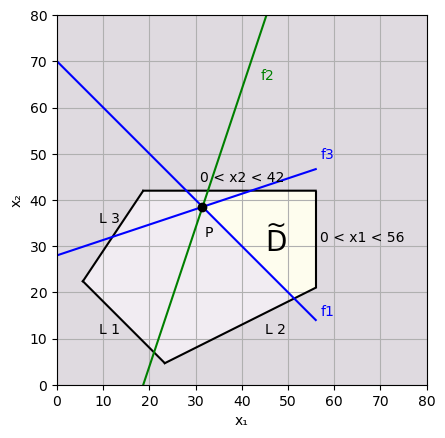

In [64]:
figure, axes = plt.subplots()
axes.set_xlim(xmin=0,xmax=80)
axes.set_ylim(ymin=0,ymax=80)

axes.grid()
plt.xlabel('x₁')
plt.ylabel('x₂')

d = np.linspace(0,100,3000)
x,y = np.meshgrid(d,d)

plt.imshow(((x+y>=28) & (x-2*y<=14) & (-3*x+2*y<=28) & (x > 0) & (x <= 56) & (y > 0) & (y <= 42))
           .astype(int), cmap='gray', extent=(x.min(), x.max(), y.min(), y.max()), origin='lower',alpha=0.075)

plt.imshow(((x+y>=70) & (x-3*y>=-84) & (x-2*y<=14) & (y <= 42) & (x <= 56) )
           .astype(int), extent=(x.min(), x.max(), y.min(), y.max()), origin='lower',alpha=0.075)

x = np.linspace(0,56,3000)
d1 = 28 - x
d2 = x/2 - 7
d3 = 14 + 1.5*x
d4 = (x*0)+42

idx13 = np.argwhere(np.diff(np.sign(d1 - d3))).flatten()
idx12 = np.argwhere(np.diff(np.sign(d1 - d2))).flatten()
idx34 = np.argwhere(np.diff(np.sign(d3 - d4))).flatten()

plt.plot(x[int(idx13):int(idx12)],d1[int(idx13):int(idx12)],color='k') 
plt.plot(x[int(idx12):],d2[int(idx12):],color='k') 
plt.plot(x[int(idx13):int(idx34)],d3[int(idx13):int(idx34)],color='k') 
plt.plot(x[int(idx34):],d4[int(idx34):],color='k') 
plt.vlines(x=56,ymin=21,ymax=42,color='k')

f1 = 70 - x
f3 = 28 + x/3

f2 = 3*x - 56

plt.plot(x,f1,color='b')
plt.plot(x,f3,color='b')
plt.plot(x,f2,color='g')

plt.text(45,33, '~', fontsize=18)
plt.text(45,29, 'D', fontsize=20)

idxo = np.argwhere(np.diff(np.sign(f1-f3)))
plt.plot(x[idxo],f3[idxo],'ko')
plt.text(32,32, 'P')

idx13 = np.argwhere(np.diff(np.sign(d1 - d3))).flatten()
idx12 = np.argwhere(np.diff(np.sign(d1 - d2))).flatten()
idx34 = np.argwhere(np.diff(np.sign(d3 - d4))).flatten()

idxk = np.argwhere(np.diff(np.sign(f1-d3)))
idxr = np.argwhere(np.diff(np.sign(f2-d4)))

plt.text(57,31, '0 < x1 < 56')
plt.text(31,44, '0 < x2 < 42')
plt.text(9,11, 'L 1')
plt.text(45,11, 'L 2')
plt.text(9,35, 'L 3')


plt.text(57,15, 'f1', color='blue')
plt.text(44,66, 'f2', color='green')
plt.text(57,49, 'f3', color='blue')

print('L1: x1 + x2 > 28', 'L2: x1 - 2*x2 < 14', 'L3: -3*x1 + 2*x2 < 28', sep='\n')
print('\nf1: x1 + x2 = 70', 'f2: -3*x1 + x2 = -56', 'f3: x1 - 3*x2 = -84', sep='\n')

P - оптимальная точка с координатами [31.5 38.5] 